In [1]:
import pandas as pd 
import numpy as np 
import pickle 
import torch as t
from sklearn.model_selection import train_test_split

In [2]:
with open('data/datasets/curated_dataset_full.pkl', 'rb') as file:
    data = pickle.load(file)


In [5]:
data['filename'].unique()
remainder = data[~data['filename'].isin(['common_claim_true_false.csv', 'companies_true_false.csv', 'counterfact_true_false.csv'])]

In [9]:
with open('data/datasets/coherence/neg_dataset.pkl', 'rb') as f:
       other_dataset = pickle.load(f)

other_dataset

,statement,new_statement,label,filename,neg_label
0,Spiders can use surface tension to walk on water.,Spiders cannot use surface tension to walk on ...,1,neg_common_claim_true_false.csv,0
1,Claw ticks were once used as a form of torture.,Claw ticks were not once used as a form of tor...,1,neg_common_claim_true_false.csv,0
2,A military brat is a colloquial term for a chi...,A military brat is not a colloquial term for a...,1,neg_common_claim_true_false.csv,0
3,Mice can fall from a fifth story window and wa...,Mice cannot fall from a fifth story window and...,1,neg_common_claim_true_false.csv,0
4,"Male turkeys (""tom turkeys"") often sport extre...","Male turkeys (""tom turkeys"") do not often spor...",1,neg_common_claim_true_false.csv,0
...,...,...,...,...,...
20054,Arnold Hague originates from Boston.,Arnold Hague does not originate from Boston.,1,neg_counterfact_true_false.csv,0
16768,Blanca de Silos holds a citizenship from Spain.,Blanca de Silos does not hold a citizenship fr...,1,neg_counterfact_true_false.csv,0
30602,Matthew Pratt died in the city of Philadelphia.,Matthew Pratt did not die in the city of Phila...,1,neg_counterfact_true_false.csv,0
30750,Brock Lesnar professionally plays the sport fo...,Brock Lesnar does not professionally play the ...,1,neg_counterfact_true_false.csv,0


In [2]:
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
import seaborn as sns
import pandas as pd
import einops
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.stats import gaussian_kde
from sklearn.base import clone
import os
from datetime import datetime
import torch as t

In [17]:
def plot_line(x, title="DummyTitle", x_axis="Layer", y_axis="Accuracy", label="Model"):

    fig, ax = plt.subplots(figsize=(12, 8), facecolor='w')
    ax.set_facecolor('#e0e0e0')
    ax.plot(x, color='#007acc', alpha=0.7, marker='o',
            markersize=8, linewidth=2.5, label=label)

    ax.set_title(title, fontsize=18, pad=20, weight='bold', color='#333333')
    ax.set_xlabel(x_axis, fontsize=14, labelpad=10, color='#333333')
    ax.set_ylabel(y_axis, fontsize=14, labelpad=10, color='#333333')

    ax.grid(visible=True, which='major', color='#f7f7f7',
            linewidth=1.5, linestyle='--')
    ax.tick_params(axis='both', which='major',
                   labelsize=12, color='#555555')

    legend = ax.legend(fontsize=12, loc='upper right', frameon=True)
    legend.get_frame().set_facecolor('#ffffff')
    legend.get_frame().set_edgecolor('#e0e0e0')
    legend.get_frame().set_alpha(0.9)

    for spine in ax.spines.values():
        spine.set_visible(False)

    plt.tight_layout()
    # save_fig(f"line_{title}")


def plot_heat(accuracies, title="DummyTitle", x_axis="Heads (Sorted)",
              y_axis="Layers (Bottom-Up)", model="Model", probe="Probe"):

    accuracies = np.array(accuracies)
    sorted_accuracies = np.sort(accuracies, axis=1)[:, ::-1]
    sorted_accuracies = sorted_accuracies[::-1, :]

    norm = colors.Normalize(
        vmin=sorted_accuracies.min(),
        vmax=max(sorted_accuracies.max(), 0.75)
    )

    plt.figure(figsize=(10, 8))
    sns.set(style="whitegrid")
    ax = sns.heatmap(
        sorted_accuracies,
        annot=False,
        fmt=".2f",
        cmap="cividis",
        cbar_kws={"shrink": 0.9, "aspect": 22},
        linewidths=0,
        linecolor="white",
        norm=norm
    )

    num_layers = sorted_accuracies.shape[0]
    num_heads = sorted_accuracies.shape[1]

    ax.set_yticks(np.arange(num_layers) + 0.5)
    ax.set_yticklabels(np.arange(num_layers - 1, -1, -1), fontsize=10)
    ax.set_xticks([])

    plt.suptitle(title, fontsize=18)
    plt.title(f"Model: {model} | Probe: {probe}")
    plt.xlabel(x_axis, fontsize=12, labelpad=10)
    plt.ylabel(y_axis, fontsize=12, labelpad=10)

    ax.hlines(np.arange(1, num_layers), *ax.get_xlim(),
              colors="white", linestyles="solid", linewidth=0.2)
    ax.vlines(np.arange(1, num_heads), *ax.get_ylim(),
              colors="white", linestyles="solid", linewidth=0.2)

    plt.tight_layout()

In [16]:
from pathlib import Path

# ACCURACY

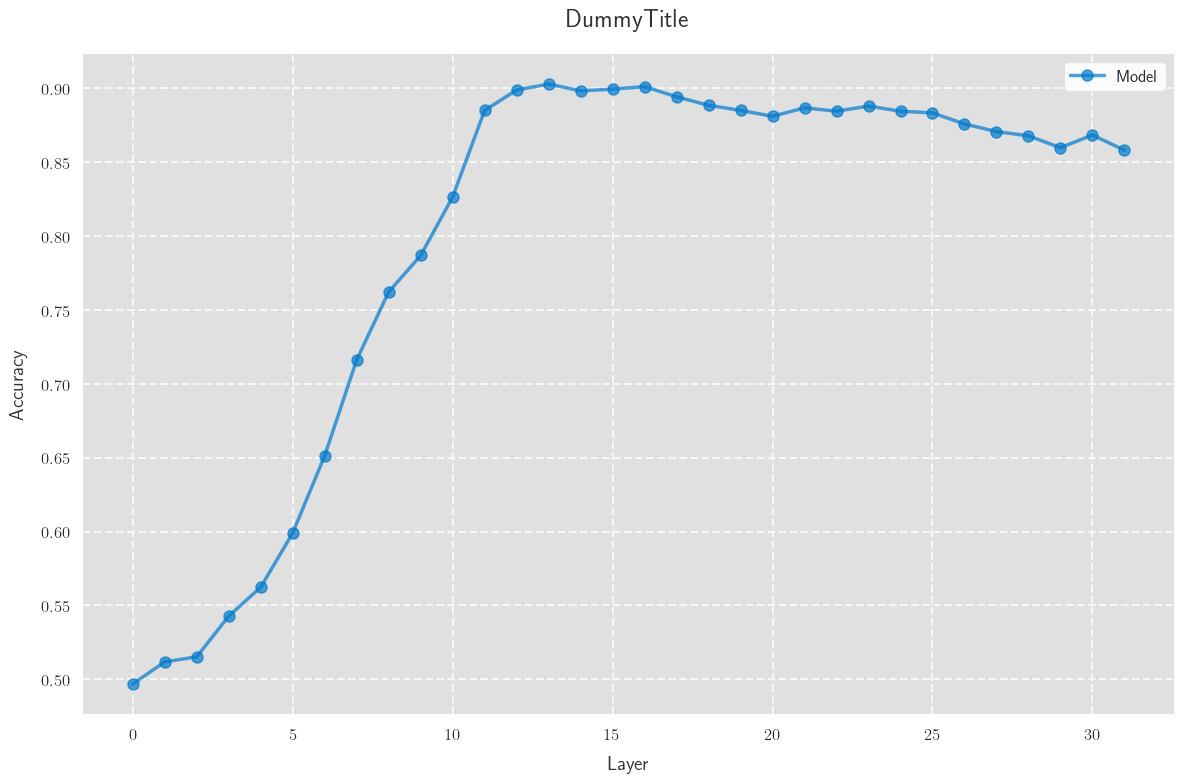

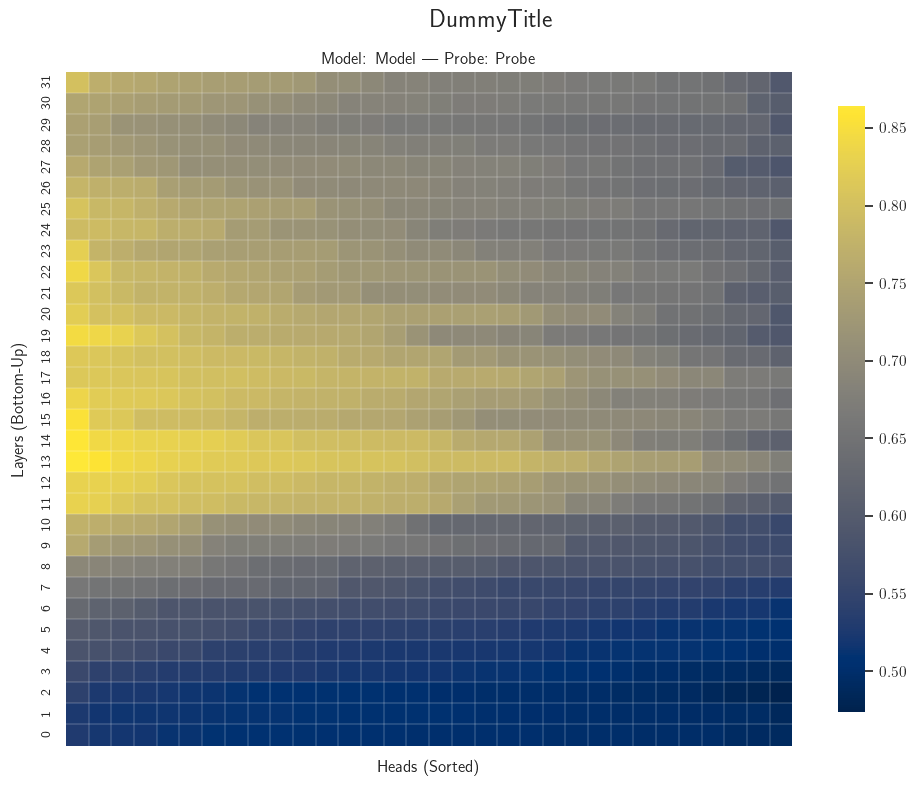

In [ ]:
PATH = Path('results_to_plot')
model = 'llama'
data_heads = t.load(PATH / model / 'ACCURACY' / 'accuracies_heads')
data_residual = t.load(PATH / model / 'ACCURACY' / 'accuracies_residual')

plot_line(data_residual)
plot_heat(data_heads)

# USE

In [54]:
import os

model = 'llama_instruct'
folder = (PATH / model / 'USE')


for filename in os.listdir(folder):
    if filename.endswith("heads") or filename.endswith("residual"): 
        continue
    else:
        file_path = os.path.join(folder, filename)
        data = t.load(file_path)
        print(f"{filename}: {data}")

intervention_sweep_heads_20251223_105127: [[-0.44238389]]
intervention_sweep_heads_20251223_105850: [[-9.93016379e-05]]
intervention_sweep_heads_20251223_110808: [[-0.00102712]]
intervention_sweep_heads_20251223_115412: [[ 0.5723845   0.55554388  0.53703438  0.51644046  0.49441321]
 [ 0.15242578 -0.73705094 -0.97353039 -0.98099307 -0.97342858]
 [-0.06147312 -0.95842839 -0.96665825 -0.89994219 -0.75538596]
 [-0.16367309 -0.94521045 -0.80144698 -0.31094074 -0.04810906]
 [-0.51968346 -0.95755797 -0.7492332  -0.15304286 -0.00465545]]
intervention_sweep_heads_20251223_150223: [[-0.80890947]]
intervention_sweep_heads_20251223_153941: [[-0.77893561 -0.76634012 -0.75491346 -0.74167699 -0.71978331]
 [-0.80913743 -0.79556886 -0.78416586 -0.77186658 -0.75133805]
 [-0.83655984 -0.81805401 -0.80399803 -0.78882317 -0.76533596]
 [-0.8377742  -0.81853672 -0.804344   -0.7889264  -0.76554508]]
intervention_sweep_heads_20251223_195525: [[-1.67729104e-01 -1.64068699e-01 -1.59602490e-01 -1.54604988e-01
  -

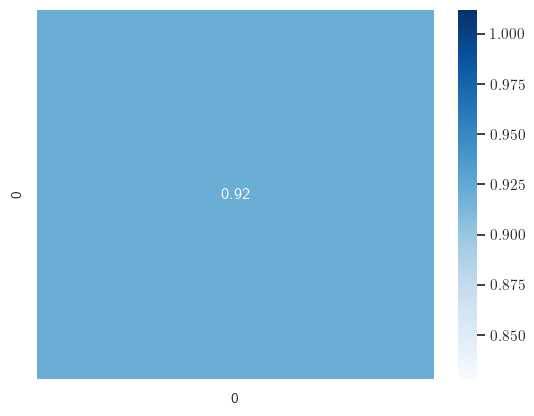

In [48]:
INTERVENTION_TYPE = 'residual'
model = 'gpt-j'
data_sweep = t.load(PATH / model / 'USE' / f"intervention_sweep_{INTERVENTION_TYPE}")
n_rows, n_cols = data_sweep.shape
fig, ax = plt.subplots()

# Set x and y ticks manually
ax.set_xticks(np.arange(n_cols) + 0.5)           # positions
ax.set_xticklabels([0 for _ in range(n_cols)])  # labels
ax.set_yticks(np.arange(n_rows) + 0.5)
ax.set_yticklabels([0 for _ in range(n_rows)])

sns.heatmap(data_sweep, annot=True, cmap='Blues')  # annot=True shows the numbers
plt.show()

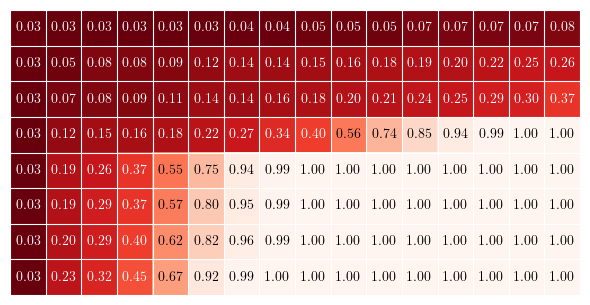

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

# --- Configuration for ACL-style appearance ---
rcParams.update({
    "text.usetex": True,       # Use LaTeX for consistent fonts
    "font.family": "serif",    # Matches ACL paper font
    "axes.titlesize": 10,
    "axes.labelsize": 9,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8
})

# Slice first 10x10
data = np.array(data)
subset = data[:8, :16]

# --- Create figure ---
fig, ax = plt.subplots(figsize=(6, 4))  # compact square figure

cmap = plt.cm.Reds_r
im = ax.imshow(subset, cmap=cmap, interpolation='none', aspect='equal')

# Add subtle borders
for i in range(subset.shape[0] + 1):
    ax.axhline(i - 0.5, color='white', linewidth=0.8)
for j in range(subset.shape[1] + 1):
    ax.axvline(j - 0.5, color='white', linewidth=0.8)

# Annotations with automatic contrast
for i in range(subset.shape[0]):
    for j in range(subset.shape[1]):
        color = 'white' if subset[i, j] < 0.5 else 'black'
        ax.text(j, i, f"{subset[i, j]:.2f}", ha='center', va='center', color=color, fontsize=10)

# Remove axes for minimal look
ax.set_xticks([])
ax.set_yticks([])
ax.set_frame_on(False)

plt.tight_layout()
# --- Save as vector PDF for ACL submission ---
plt.savefig("heatmap_acl_style.pdf", bbox_inches='tight')
plt.show()


# COHERENCE

# UNIFORMITY

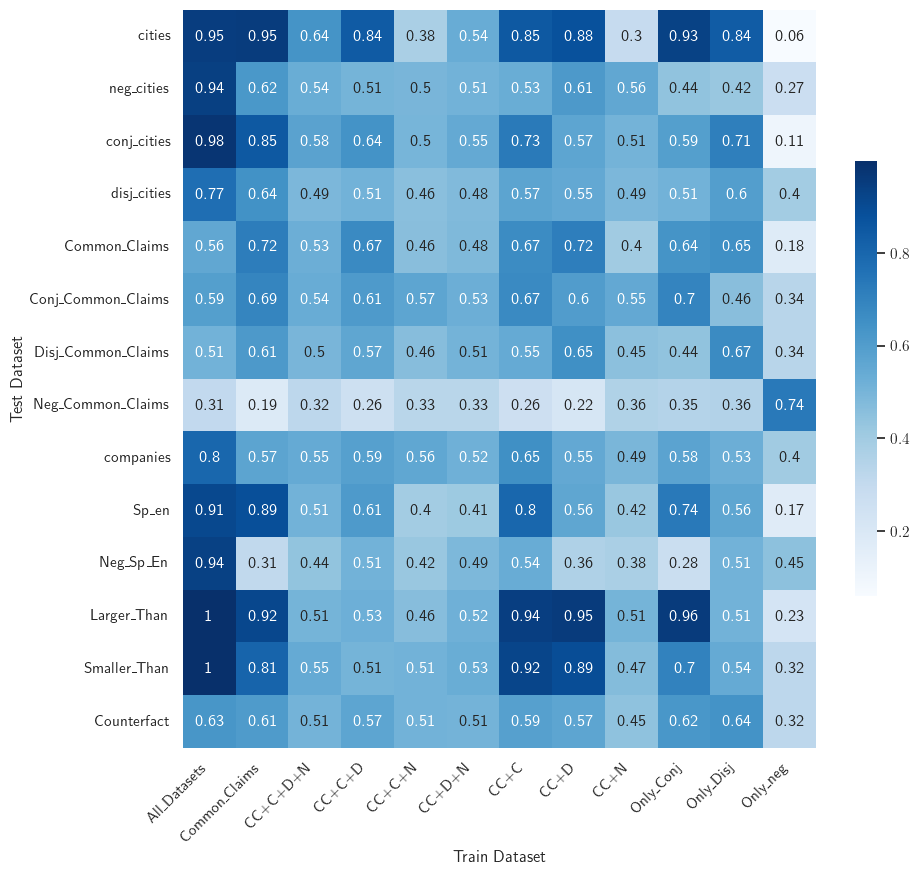

In [100]:
model = 'llama_instruct'
UNIF_TYPE = 'logic'

if UNIF_TYPE == 'domain':
    x_ticks = ['All_Datasets', 'Common_Claims', 'CC+Cities', 'cities', 'CC+Companies', 'companies', 'CC+Sp_en', 'Sp_en', 'CC+Larger_Than', 'Larger_than', 'CC+Counterfact', 'Counterfact']
    y_ticks = ['cities', 'Common_Claims', 'companies', 'Sp_En', 'Larger_Than', 'Counterfact']

elif UNIF_TYPE == 'logic':
    x_ticks = ['All_Datasets', 'Common_Claims', 'CC+C+D+N', 'CC+C+D', 'CC+C+N', 'CC+D+N', 'CC+C', 'CC+D', 'CC+N', 'Only_Conj', 'Only_Disj', 'Only_neg']
    y_ticks = ['cities', 'neg_cities', 'conj_cities', 'disj_cities', 'Common_Claims', 'Conj_Common_Claims', 'Disj_Common_Claims', 'Neg_Common_Claims', 'companies', 'Sp_en', 'Neg_Sp_En', 'Larger_Than', 'Smaller_Than', 'Counterfact']

else:
    raise ValueError("You messed up. Have an error")

# Your data loading code remains the same
data_sweep = t.load(PATH / model / 'UNIFORMITY' / f"uniformity_uniformity{UNIF_TYPE}")
data_sweep = np.array([[data_sweep[row][col][0] for col in sorted(data_sweep[row])] for row in sorted(data_sweep)]).T

n_rows, n_cols = data_sweep.shape

# Make figure bigger
fig, ax = plt.subplots(figsize=(10, 10))  # adjust size as needed

sns.heatmap(data_sweep, annot=True, cmap='Blues',
            xticklabels=x_ticks, yticklabels=y_ticks,
            square=True, ax=ax, cbar_kws={'shrink': 0.5})

# Rotate ticks
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Caption axes
ax.set_xlabel("Train Dataset")
ax.set_ylabel("Test Dataset")

plt.tight_layout()
plt.show()


# FINAL SCORES

In [ ]:
import plotly.graph_objects as go

# Example normalized data
benchmarks = ['Accuracy', 'Use', 'Coherence 1', 'Coherence 2', 'Uniformity']
model_scores = {
    'Llama': [0.91, 0.90, 0.6, 0.9, 0.7],
    'Llama-It': [0.90, 1, 0.7, 0.9, 0.6],
    'Gemma': [0.93, 0.94, 0.8, 0.7, 0.8],
    'Gemma-It': [0.93, 0.95, 0.82, 0.9, 0.5],
    'GPT-J': [0.78, 0.6, 0.5, 0.5, 0.55],
}

fig = go.Figure()

for model, scores in model_scores.items():
    fig.add_trace(go.Scatterpolar(
        r=scores + [scores[0]],  # close the circle
        theta=benchmarks + [benchmarks[0]],
        fill='none',  # no fill for clarity
        name=model
    ))

fig.update_layout(
    polar=dict(
        radialaxis=dict(visible=True, range=[0.5, 1])
    ),
    showlegend=True,
    title="Model Benchmark Radar Chart"
)

fig.show()
